## Title: Custom Song Classification and Analysis
## Group Members
  ### Naga Venkata Kanakalakshmi Murikipudi - 11725119
  ### Naga Sai Sivani Tutika - 11703058
## Group-15

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.9 MB/s eta 0:00:00


In [ ]:
!pip install gdown

In [ ]:
!pip install langdetect

In [ ]:
!pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=aaf1225c392f154db56a7bc9073e9a758756ceb5faa007c7d6bd52fc5a65c237
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [ ]:
#imports
import gdown
import pandas as pds_15

from tabulate import tabulate as tabulate_15
import matplotlib.pyplot as mplt_15

import nltk as nltk_15
from nltk.corpus import stopwords as stopwords_15
from nltk.corpus import words

import contractions as contractions_15

import re as re_15
from langdetect import detect, DetectorFactory
import langid

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

import matplotlib.pyplot as plt_15
import seaborn as sns_15


## Data Loading

### Loading the Dataset-1

In [ ]:
# Use the file ID from your shareable link
file_id = '1k-ocQutBEDBokcXO3OaZbcXVpdCjKrt5'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'songs_file.csv'
gdown.download(url, output, quiet=False)

# Step 4: Load the file into a DataFrame
songs_dataframe_1 = pds_15.read_csv(output)

Downloading...
From (original): https://drive.google.com/uc?id=1k-ocQutBEDBokcXO3OaZbcXVpdCjKrt5
From (redirected): https://drive.google.com/uc?id=1k-ocQutBEDBokcXO3OaZbcXVpdCjKrt5&confirm=t&uuid=75bcff56-fb9e-4229-a975-b5578102f6d2
To: /content/songs_file.csv
100%|██████████| 1.54G/1.54G [00:36<00:00, 42.0MB/s]


In [ ]:
#Displaying the data in the tabular format
songs_dataframe_1['lyrics'] = songs_dataframe_1['lyrics'].apply(lambda x: x.splitlines()[0] if isinstance(x, str) and x.strip() else x)
songs_dataframe_1.head()

,id,name,album_name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics
0,0Prct5TDjAnEgIqbxcldY9,!,UNDEN!ABLE,['HELLYEAH'],0.415,0.6050,7,-11.157,1,0.0575,0.00116,0.838000,0.4710,0.193,100.059,79500.0,"He said he came from Jamaica,"
1,2ASl4wirkeYm3OWZxXKYuq,!!,NaN,Yxngxr1,0.788,0.6480,7,-9.135,0,0.3150,0.90000,0.000000,0.1760,0.287,79.998,114000.0,"Fucked a bitch, now she running with my kids"
2,69lcggVPmOr9cvPx9kLiiN,!!! - Interlude,Where I Belong EP,['Glowie'],0.000,0.0354,7,-20.151,0,0.0000,0.90800,0.000000,0.4790,0.000,0.000,11413.0,"Oh, my God, I'm going crazy"
3,4U7dlZjg1s9pjdppqZy0fm,!!De Repente!!,Un Palo Al Agua (20 Grandes Canciones),['Rosendo'],0.657,0.8820,5,-6.340,1,0.0385,0.00740,0.000013,0.0474,0.939,123.588,198173.0,Continuamente se extraña la gente si no puede ser verdad
4,4v1IBp3Y3rpkWmWzIlkYju,!!De Repente!!,Fuera De Lugar,['Rosendo'],0.659,0.8930,5,-8.531,1,0.0411,0.09220,0.000019,0.0534,0.951,123.600,199827.0,Continuamente se extraña la gente si no puede ser verdad


### Loading the Dataset-2

In [ ]:
# Use the file ID from your shareable link
#https://drive.google.com/file/d/1e0gfFwWlQ6_XAoGsbjAB9FthGNucJKyU/view?usp=sharing
file_id = '1e0gfFwWlQ6_XAoGsbjAB9FthGNucJKyU'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'songs_file.csv'
gdown.download(url, output, quiet=False)

# Step 4: Load the file into a DataFrame
songs_dataframe_2 = pds_15.read_csv(output)

# Step 5: Display the top 5 records
songs_dataframe_2.head()

Downloading...
From (original): https://drive.google.com/uc?id=1e0gfFwWlQ6_XAoGsbjAB9FthGNucJKyU
From (redirected): https://drive.google.com/uc?id=1e0gfFwWlQ6_XAoGsbjAB9FthGNucJKyU&confirm=t&uuid=a063bee5-01b4-4d19-90e8-35737b55a00c
To: /content/songs_file.csv
100%|██████████| 2.42G/2.42G [00:47<00:00, 50.7MB/s]


,id,startTimeMs,words
0,000TJYlDLPM01ebX8QtIUS,42710,Siento escapar mi vida
1,000TJYlDLPM01ebX8QtIUS,70350,"que triste se va, triste termina."
2,000TJYlDLPM01ebX8QtIUS,74780,Intento olvidar tu gran herida
3,000TJYlDLPM01ebX8QtIUS,87530,"que siendo mortal, es también mía."
4,000TJYlDLPM01ebX8QtIUS,94990,Tal vez podré algún día surcar otra vez


In [ ]:
# Display the shape of the dataset
songs_dataframe_1_shape = songs_dataframe_1.shape
print(f"The shape of the dataset-1 is: {songs_dataframe_1_shape}")

songs_dataframe_2_shape = songs_dataframe_2.shape
print(f"The shape of the dataset-2 is: {songs_dataframe_2_shape}")

The shape of the dataset-1 is: (955320, 17)
The shape of the dataset-2 is: (36519092, 3)


### Merging the Datasets

In [ ]:
import pandas as pd

# Copy 'lyrics' column to 'full_lyrics' to store the complete lyrics for each song
songs_dataframe_2['full_lyrics'] = songs_dataframe_2['lyrics']

# Loop through each id in songs_info_dataframe and concatenate lyrics from songs_lyrics_dataframe
for idx, song_id in enumerate(songs_dataframe_2['id']):
    # Check if the song ID exists in the lyrics DataFrame
    if song_id in songs_dataframe_2['id'].values:
        # Concatenate lyrics based on the ID, handling missing values
        full_lyrics = '\n'.join([str(lyric) for lyric in songs_dataframe_1[songs_dataframe_1['id'] == song_id]['lyrics'].dropna()])
        # Assign concatenated lyrics back to the 'full_lyrics' column for the matching song ID
        songs_dataframe_1.at[idx, 'full_lyrics'] = full_lyrics



In [ ]:
# Display the updated DataFrame
pds_15.set_option('display.max_columns', None)
pds_15.set_option('display.width', 1000)
pds_15.set_option('display.max_colwidth', None)

songs_dataframe = songs_dataframe_1

# Display the top 5 records
display(songs_dataframe.head(3))


,id,name,album_name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics
0,0Prct5TDjAnEgIqbxcldY9,!,UNDEN!ABLE,['HELLYEAH'],0.415,0.6050,7,-11.157,1,0.0575,0.00116,0.838,0.471,0.193,100.059,79500.0,"He said he came from Jamaica,\n he owned a couple acres A couple fake visas 'cause he never got his\n papers Gave up on love fucking with them heart breakers But he was\n getting money with the movers and the shakers He was mixed with a\n couple things, bald like a couple rings Bricks in the condo and grams\n to sing-sing Left arm,\n baby mother tatted 5-year bid up North when they ratted Anyway I felt\n him, helped him, put him on lock,\n seat-belt him Took him out to Belgium, welcome Bitches this pretty,\n that's seldom This box better than the box he was held in I'm Momma\n Dee in that order, I call him Daddy like daughters He like it when I\n get drunk, but I like it when he be sober That's top of the toppa,\n I never fuck with beginners I let him play with my pussy then lick it\n off of his fingers, I'm in the zone They holler at me, but it's you,\n you, this ain't high school Me and my crew,\n we can slide through Give it to you whenever you want,\n whip it whenever you want Baby it's yours Anywhere, everywhere,\n baby it's your world, ain't it?\n (alright) Baby it's your world, ain't it?\n Uh, she got a nigga at home and one on the side Best friend is a\n dyke, they fucked around a few times Her and her momma alike,\n so all they do is fight I tell her ""make me some money"",\n she tell me ""make me a wife"" I tell that bitch ""you crazy,\n fuck wrong with you?"" And excuse my French,\n but I'm a long kisser And then she try to tell me I'm the only one\n that's hitting And I say ""what about them niggas?"" She say:\n ""what about them niggas?"" You right, what you doing tonight?\n Put on something tight, don't judge me,\n I'd get life She love me like a brother,\n but fuck me like a husband Pussy like a oven,\n too hot to put my tongue in All I had to do is rub it,\n the genie out the bottle Pussy so wet,\n I'mma need goggles She tell me that's it's mine,\n I tell her ""stop lying, mine and who else?\n "" She say worry about yourself Lil Tune They holler at me,\n but it's you, you, this ain't high school Me and my crew,\n we can slide through Give it to you whenever you want,\n whip it whenever you want Baby it's yours\n Anywhere, everywhere, baby it's your world, ain't it?\n Baby it's your world, ain't it?\n I know you want it boy, I see you tryin' Just keep on pushing,\n I'mma let you slide in Just close your eyes and,\n this horizon It's ready, come get you some Yeah, yeah, yeah, yeah"
1,2ASl4wirkeYm3OWZxXKYuq,!!,NaN,Yxngxr1,0.788,0.6480,7,-9.135,0,0.3150,0.90000,0.000,0.176,0.287,79.998,114000.0,"Fucked a bitch, now she running with my kids\n And you said I never listen, yeah, yeah\n Yeah, yeah, yeah\n Tell me all the things 'bout your family\n Struggle with your words, said you're rambling\n Always playing games but you're gambling\n But you got me on a string and I'm dancing\n Tell me your childhood TV shows\n Tell me something that I could run with\n So I feel lucky\n So I feel lucky, yeah\n I'm only here for love\n Tell me all the things about you, baby\n I won't know\n I'm only here for love\n Tell me all the things about you, baby\n I won't know\n I'm only here for love\n Tell me all the things about you, baby\n I won't know\n I'm only here for love, oh-oh-oh-oh\n Got a tough heart 'cause of your rough start\n But you love cars\n And I love stars\n And your main dream is the only thing you see\n But you never fuck with me\n But I'm more than I seem, yeah\n Comin' home to you, baby\n And the way you flick your hair makes me crazy\n I've been making so much time for you lately\n But you never have time for me lately\n I'm only here for love\n Tell me all the things about you, baby\n I won't know\n I'm only here for love\n Tell me all the thi

## Display Data

In [ ]:
# Display the shape of the dataset
songs_dataframe_shape = songs_dataframe.shape
print(f"The shape of the dataset is: {songs_dataframe_shape}")

The shape of the dataset is: (100000, 17)


## Features of the Dataset

In [ ]:
# Create a list of features
features = songs_dataframe.columns.tolist()

# Create a list of lists for tabulate
features_list = [[feature] for feature in features]

# Display the features in a table format
print(tabulate_15(features_list, headers=["Features"], tablefmt="grid"))

+------------------+
| Features         |
+==================+
| id               |
+------------------+
| name             |
+------------------+
| album_name       |
+------------------+
| artists          |
+------------------+
| danceability     |
+------------------+
| energy           |
+------------------+
| key              |
+------------------+
| loudness         |
+------------------+
| mode             |
+------------------+
| speechiness      |
+------------------+
| acousticness     |
+------------------+
| instrumentalness |
+------------------+
| liveness         |
+------------------+
| valence          |
+------------------+
| tempo            |
+------------------+
| duration_ms      |
+------------------+
| lyrics           |
+------------------+


## Data Preprocessing

### Finding the NULL Values

In [ ]:
# Create a summary DataFrame
summary_data = {
    "Column": songs_dataframe.columns,
    "Total Records": len(songs_dataframe),
    "Non-Null Count": songs_dataframe.notnull().sum(),
    "Null Count": songs_dataframe.isnull().sum(),
    "Dtype": songs_dataframe.dtypes,
}

summary_df = pds_15.DataFrame(summary_data)

# Print the summary in a tabular format
print(tabulate_15(summary_df, headers='keys', tablefmt='grid', showindex=False))

+------------------+-----------------+------------------+--------------+---------+
| Column           |   Total Records |   Non-Null Count |   Null Count | Dtype   |
+==================+=================+==================+==============+=========+
| id               |          100000 |           100000 |            0 | object  |
+------------------+-----------------+------------------+--------------+---------+
| name             |          100000 |           100000 |            0 | object  |
+------------------+-----------------+------------------+--------------+---------+
| album_name       |          100000 |            40474 |        59526 | object  |
+------------------+-----------------+------------------+--------------+---------+
| artists          |          100000 |           100000 |            0 | object  |
+------------------+-----------------+------------------+--------------+---------+
| danceability     |          100000 |           100000 |            0 | float64 |
+---

### Handling the NULL Values

In [ ]:
# Remove records with null values in the 'lyrics' column
songs_dataframe_cleaned = songs_dataframe.dropna(subset=['lyrics'])

# Impute null values in 'name', 'album_name', and 'artists' columns with "Unknown"
songs_dataframe_cleaned['album_name'].fillna('Unknown', inplace=True)

# Create a summary DataFrame
summary_data = {
    "Column": songs_dataframe_cleaned.columns,
    "Total Records": len(songs_dataframe_cleaned),
    "Non-Null Count": songs_dataframe_cleaned.notnull().sum(),
    "Null Count": songs_dataframe_cleaned.isnull().sum(),
    "Dtype": songs_dataframe_cleaned.dtypes,
}

summary_df = pds_15.DataFrame(summary_data)

# Print the summary in a tabular format
print(tabulate_15(summary_df, headers='keys', tablefmt='grid', showindex=False))


<ipython-input-16-c1a39b50bb82>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  songs_dataframe_cleaned['album_name'].fillna('Unknown', inplace=True)


+------------------+-----------------+------------------+--------------+---------+
| Column           |   Total Records |   Non-Null Count |   Null Count | Dtype   |
+==================+=================+==================+==============+=========+
| id               |          100000 |           100000 |            0 | object  |
+------------------+-----------------+------------------+--------------+---------+
| name             |          100000 |           100000 |            0 | object  |
+------------------+-----------------+------------------+--------------+---------+
| album_name       |          100000 |           100000 |            0 | object  |
+------------------+-----------------+------------------+--------------+---------+
| artists          |          100000 |           100000 |            0 | object  |
+------------------+-----------------+------------------+--------------+---------+
| danceability     |          100000 |           100000 |            0 | float64 |
+---

### Removing STOPWORDS from 'lyrics'

In [ ]:
# Download stop words (run this line once)
nltk_15.download('stopwords')

# Get the English stop words
stop_words = set(stopwords_15.words('english'))

# Function to remove stop words from lyrics
def remove_stop_words(lyrics):
    words = lyrics.split()
    return ' '.join([word for word in words if word.lower() not in stop_words])

# Apply the function to the lyrics column using .loc
songs_dataframe_cleaned.loc[:, 'lyrics'] = songs_dataframe_cleaned['lyrics'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Display the DataFrame in tabular format after removing stop words
pds_15.set_option('display.max_columns', None)
pds_15.set_option('display.width', 1000)
pds_15.set_option('display.max_colwidth', None)
display(songs_dataframe_cleaned.head(3))


,id,name,album_name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics
0,0Prct5TDjAnEgIqbxcldY9,!,UNDEN!ABLE,['HELLYEAH'],0.415,0.6050,7,-11.157,1,0.0575,0.00116,0.838,0.471,0.193,100.059,79500.0,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah"
1,2ASl4wirkeYm3OWZxXKYuq,!!,Unknown,Yxngxr1,0.788,0.6480,7,-9.135,0,0.3150,0.90000,0.000,0.176,0.287,79.998,114000.0,"Fucked bitch, running kids said never listen, yeah, yeah Yeah, yeah, yeah Tell things 'bout family Struggle words, said rambling Always playing games gambling got string I'm dancing Tell childhood TV shows Tell something could run feel lucky feel lucky, yeah I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-oh Got tough heart 'cause rough start love cars love stars main dream thing see never fuck I'm seem, yeah Comin' home you, baby way flick hair makes crazy I've making much time lately never time lately I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-oh I'm love, oh-oh-oh-oh"
2,69lcggVPmOr9cvPx9kLiiN,!!! - Interlude,Where I Belong EP,['Glowie'],0.000,0.0354,7,-20.151,0,0.0000,0.90800,0.000,0.479,0.000,0.000,11413.0,"Oh, God, I'm going crazy"


In [ ]:
# Display settings for neat tabular display
pds_15.set_option('display.max_columns', None)  # Display all columns
pds_15.set_option('display.width', 1000)        # Set display width to fit more columns
pds_15.set_option('display.max_colwidth', None) # Prevent truncation of long text in columns

# Display only the 'id' and 'lyrics_cleaned' columns from the existing 'songs_dataframe_cleaned'
display(songs_dataframe_cleaned[['id', 'lyrics']].head(3))


,id,lyrics
0,0Prct5TDjAnEgIqbxcldY9,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah"
1,2ASl4wirkeYm3OWZxXKYuq,"Fucked bitch, running kids said never listen, yeah, yeah Yeah, yeah, yeah Tell things 'bout family Struggle words, said rambling Always playing games gambling got string I'm dancing Tell childhood TV shows Tell something could run feel lucky feel lucky, yeah I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-oh Got tough heart 'cause rough start love cars love stars main dream thing see never fuck I'm seem, yeah Comin' home you, baby way flick hair makes crazy I've making much time lately never time lately I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-oh I'm love, oh-oh-oh-oh"
2,69lcggVPmOr9cvPx9kLiiN,"Oh, God, I'm going crazy"


## Exploratory Data Analysis

### Word Cloud

In [ ]:
# Generate the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

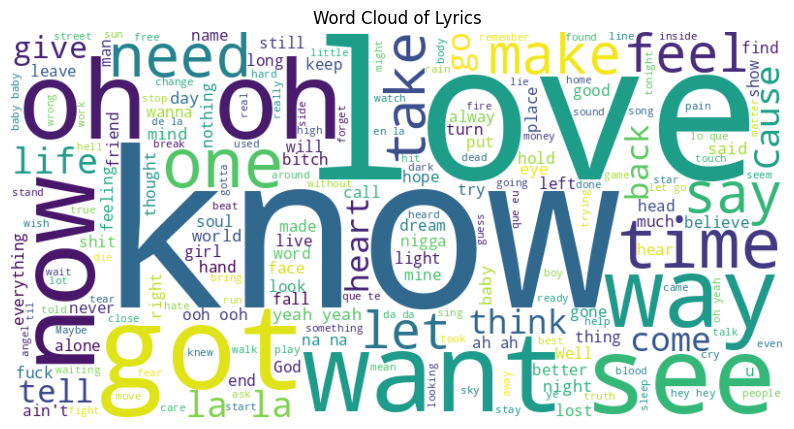

In [ ]:
lyrics_text = ' '.join(songs_dataframe_cleaned['lyrics'])


wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(lyrics_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Lyrics")
plt.show()

## Language Detection Preprocessing

### Expanding Contractions

In [ ]:
# Function to expand contractions with error handling --- 3:20 sec
def expand_contractions(text):
    try:
        # Ensure the input is a valid string
        if isinstance(text, str) and text.strip():
            expanded_text = contractions_15.fix(text)
            return expanded_text
        else:
            return text  # Return the original text if it is empty or not a string
    except Exception as e:
        print(f"Error expanding contractions: {e}")
        print("** Text with error **", text)
        return text  # Return the original text if an exception occurs

# Apply the contraction expansion to the 'lyrics' column in your DataFrame
songs_dataframe_cleaned['lyrics_expanded'] = songs_dataframe_cleaned['lyrics'].apply(expand_contractions)

# Create the final DataFrame
expanded_songs_dataframe = songs_dataframe_cleaned[['id', 'lyrics', 'lyrics_expanded']].copy()


Error expanding contractions: string index out of range
** Text with error ** Ner'deyse huzurlu sayıl'cak bir hayata sahipken Hiçbir zaman ceza evine girmem tahminen Sokaklarda vakit geçirdim saf biri Olarak da kalamazdım korkuyorum da az bir şey Ne itildim suça ne de abim gangster Ailemde şiddet yok en fazla kalk git der Üniversite sürdü yıl seneye Bir dersten uzuyor henüz söylemedim pedere Böyle de bir çevredenim yok hiç emredenim Hep bir arkadaşım tutukludur ot tek sebebi Saldırganlık olmasa da elde kelepçesi İşlemiş bir suç şimdi gerek beklemesi Mektup yazıp hatırlatırım moruk bur'dayım Sen sabret ki sonu çabuk gelsin bütün bunların Üstünde okumuştur yazan zarf üzer Gardiyana göz kırpar bütün cümleler Olur da bir şey hani bir gün İşlerim ya da üstüme kalır bir suç İsteğim yolla 1 mektup, 1 dergi, 1 foto Unutma beni deme artık yokum Olur da bir şey hani bir gün İşlerim ya da üstüme kalır bir suç İsteğim yolla 1 mektup, 1 dergi, 1 foto Unutma beni deme artık yokum Gereksiz bir korku 

In [ ]:
# Display the DataFrame in tabular format after expanding contractions
pds_15.set_option('display.max_columns', None)  # Display all columns
pds_15.set_option('display.width', 1000)        # Set display width to fit more columns
pds_15.set_option('display.max_colwidth', None) # Prevent truncation of long text in columns
display(expanded_songs_dataframe.head(3))

,id,lyrics,lyrics_expanded
0,0Prct5TDjAnEgIqbxcldY9,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah","said came Jamaica, owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that is seldom box better box held I am Momma Dee order, call Daddy like daughters like get drunk, like sober That is top toppa, never fuck beginners let play pussy lick fingers, I am zone holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? (alright) Baby world, are not it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I am long kisser try tell I am one that is hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I would get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that is mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? Baby world, are not it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah"
1,2ASl4wirkeYm3OWZxXKYuq,"Fucked bitch, running kids said never listen, yeah, yeah Yeah, yeah, yeah Tell things 'bout family Struggle words, said rambling Always playing games gambling got string I'm dancing Tell childhood TV shows Tell something could run feel lucky feel lucky, yeah I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-oh Got tough heart 'cause rough start love cars love stars main dream thing see never fuck I'm seem, yeah Comin' home you, baby way flick hair makes crazy I've making much time lately never time lately I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-oh I'm love, oh-oh-oh-oh","Fucked bitch, running kids said never listen, yeah, yeah Yeah, yeah, yeah Tell things 'bout family Struggle words, said ram

## Removing Special Characters

In [ ]:
# Function to remove punctuation and special characters
def remove_punctuation_and_special_chars(text):
    try:
        if isinstance(text, str):
            # Replace any non-alphanumeric character (except spaces) with an empty string
            cleaned_text = re_15.sub(r'[^a-zA-Z0-9\s]', '', text)
            return cleaned_text
        else:
            return text  # Return the original text if it's not a valid string
    except Exception as e:
        print(f"Error cleaning text: {e}")
        print("** Text with error **", text)
        return text  # Return the original text if an exception occurs

# Apply the function to the 'lyrics' column in your DataFrame
expanded_songs_dataframe['lyrics_without_special_characters'] = expanded_songs_dataframe['lyrics_expanded'].apply(remove_punctuation_and_special_chars)


In [ ]:
# Display the DataFrame in tabular format after expanding contractions
pds_15.set_option('display.max_columns', None)  # Display all columns
pds_15.set_option('display.width', 1000)        # Set display width to fit more columns
pds_15.set_option('display.max_colwidth', None) # Prevent truncation of long text in columns
display(expanded_songs_dataframe.head(3))

,id,lyrics,lyrics_expanded,lyrics_without_special_characters
0,0Prct5TDjAnEgIqbxcldY9,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah","said came Jamaica, owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that is seldom box better box held I am Momma Dee order, call Daddy like daughters like get drunk, like sober That is top toppa, never fuck beginners let play pussy lick fingers, I am zone holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? (alright) Baby world, are not it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I am long kisser try tell I am one that is hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I would get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that is mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? Baby world, are not it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah",said came Jamaica owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things bald like couple rings Bricks condo grams singsing Left arm baby mother tatted 5year bid North ratted Anyway felt him helped him put lock seatbelt Took Belgium welcome Bitches pretty that is seldom box better box held I am Momma Dee order call Daddy like daughters like get drunk like sober That is top toppa never fuck beginners let play pussy lick fingers I am zone holler me you you are not high school crew slide Give whenever want whip whenever want Baby Anywhere everywhere baby world are not it alright Baby world are not it Uh got nigga home one side Best friend dyke fucked around times momma alike fight tell make money tell make wife tell bitch you crazy fuck wrong you excuse French 

### Removing Non-Special Characters

In [ ]:
# Function to identify special characters, including non-English characters
def count_non_english_characters(text):
    try:
        # Check if the text is valid and not empty
        if isinstance(text, str) and text.strip():
            # Find all characters that are not standard English letters or common punctuation
            non_english_chars = re_15.findall(r'[^\x00-\x7F]', text)
            return len(non_english_chars)  # Return the count of non-English characters
        else:
            return 0  # Return 0 if the text is empty or not valid
    except Exception as e:
        print(f"Error counting non-English characters: {e}")
        print("***** Text with error *****", text)
        return 0  # Return 0 in case of an exception

# Apply the function to the 'lyrics' column in your DataFrame to count non-English characters
expanded_songs_dataframe['non_english_char_count'] = expanded_songs_dataframe['lyrics'].apply(count_non_english_characters)


# Filter out lyrics with a high number of non-English characters if needed
filtered_dataframe = expanded_songs_dataframe[expanded_songs_dataframe['non_english_char_count'] < 5]  # Adjust the threshold as needed


In [ ]:
# Display the DataFrame in tabular format after expanding contractions
pds_15.set_option('display.max_columns', None)
pds_15.set_option('display.width', 1000)
pds_15.set_option('display.max_colwidth', None)
display(filtered_dataframe.head(5))

,id,lyrics,lyrics_expanded,lyrics_without_special_characters,non_english_char_count
0,0Prct5TDjAnEgIqbxcldY9,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah","said came Jamaica, owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that is seldom box better box held I am Momma Dee order, call Daddy like daughters like get drunk, like sober That is top toppa, never fuck beginners let play pussy lick fingers, I am zone holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? (alright) Baby world, are not it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I am long kisser try tell I am one that is hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I would get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that is mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? Baby world, are not it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah",said came Jamaica owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things bald like couple rings Bricks condo grams singsing Left arm baby mother tatted 5year bid North ratted Anyway felt him helped him put lock seatbelt Took Belgium welcome Bitches pretty that is seldom box better box held I am Momma Dee order call Daddy like daughters like get drunk like sober That is top toppa never fuck beginners let play pussy lick fingers I am zone holler me you you are not high school crew slide Give whenever want whip whenever want Baby Anywhere everywhere baby world are not it alright Baby world are not it Uh got nigga home one side Best friend dyke fucked around times momma alike fight tell make money tell make wife tell bitch you crazy fuck w

### Preparing Dataset to Detect language Model

In [ ]:
# Display the shape of the dataset
filtered_dataframe_shape = filtered_dataframe.shape
print(f"The shape of the dataset is: {filtered_dataframe_shape}")

The shape of the dataset is: (73394, 5)


In [ ]:
filtered_dataframe.to_csv('filtered_dataframe.csv', index=False)

In [ ]:
# Load the dataset
file_path = "/content/filtered_dataframe.csv"
language_detection_songs_dataframe = pd.read_csv(file_path)

In [ ]:
# Display settings for neat tabular display
pds_15.set_option('display.max_columns', None)  # Display all columns
pds_15.set_option('display.width', 1000)        # Set display width to fit more columns
pds_15.set_option('display.max_colwidth', None) # Prevent truncation of long text in columns

# Display only the 'id' and 'lyrics_cleaned' columns from the existing 'songs_dataframe_cleaned'
display(language_detection_songs_dataframe.head(3))

,id,lyrics,lyrics_expanded,lyrics_without_special_characters,non_english_char_count
0,0Prct5TDjAnEgIqbxcldY9,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah","said came Jamaica, owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that is seldom box better box held I am Momma Dee order, call Daddy like daughters like get drunk, like sober That is top toppa, never fuck beginners let play pussy lick fingers, I am zone holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? (alright) Baby world, are not it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I am long kisser try tell I am one that is hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I would get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that is mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? Baby world, are not it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah",said came Jamaica owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things bald like couple rings Bricks condo grams singsing Left arm baby mother tatted 5year bid North ratted Anyway felt him helped him put lock seatbelt Took Belgium welcome Bitches pretty that is seldom box better box held I am Momma Dee order call Daddy like daughters like get drunk like sober That is top toppa never fuck beginners let play pussy lick fingers I am zone holler me you you are not high school crew slide Give whenever want whip whenever want Baby Anywhere everywhere baby world are not it alright Baby world are not it Uh got nigga home one side Best friend dyke fucked around times momma alike fight tell make money tell make wife tell bitch you crazy fuck w

## Language Detection

### Language Detection - Method-1: Using 'langdetect' Library

In [ ]:
DetectorFactory.seed = 0

def detect_language(text):
    try:
        # Only detect if the text has a minimum length and is not just whitespace
        if isinstance(text, str) and text.strip():
            return detect(text)
        else:
            return 'unknown'  # Assign 'unknown' if the text is empty or whitespace
    except Exception as e:
        print(e)
        print("** Text with error **", text)
        return 'unknown'  # Assign 'unknown' if detection fails

# Use apply to detect languages for all rows in the 'lyrics_without_special_characters' column
language_detection_songs_dataframe['lyrics_detected_langdetect'] = language_detection_songs_dataframe['lyrics_without_special_characters'].apply(detect_language)



In [ ]:
# Display the DataFrame in tabular format
pds_15.set_option('display.max_columns', None)  # Display all columns
pds_15.set_option('display.width', 1000)        # Set display width to fit more columns
pds_15 .set_option('display.max_colwidth', None) # Prevent truncation of long text in columns
display(language_detection_songs_dataframe[['id', 'lyrics', 'lyrics_detected_langdetect',]].head(5))

,id,lyrics,lyrics_detected_langdetect
0,0Prct5TDjAnEgIqbxcldY9,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah",en
1,2ASl4wirkeYm3OWZxXKYuq,"Fucked bitch, running kids said never listen, yeah, yeah Yeah, yeah, yeah Tell things 'bout family Struggle words, said rambling Always playing games gambling got string I'm dancing Tell childhood TV shows Tell something could run feel lucky feel lucky, yeah I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-oh Got tough heart 'cause rough start love cars love stars main dream thing see never fuck I'm seem, yeah Comin' home you, baby way flick hair makes crazy I've making much time lately never time lately I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-oh I'm love, oh-oh-oh-oh",en
2,69lcggVPmOr9cvPx9kLiiN,"Oh, God, I'm going crazy",cy
3,4U7dlZjg1s9pjdppqZy0fm,"Continuamente se extraña la gente si puede ser verdad que de repente tan fácilmente material sin estrenar sin estrenar, material sin estrenar. De nada entiendo, pero defiendo con la goma de borrar sorprendo de como vendo material sin estrenar sin estrenar, material sin estrenar, material sin estrenar, material sin estrenar. Cuando el cliente saco los dientes pongo vacilar de repente hago de vientre, material sin estrenar sin estrenar, material sin estrenar. Parece caro, pero paro sin volver un paso atrás entro de frente contra la corriente material sin estrenar sin estrenar, material sin estrenar, material sin estrenar, material sin estrenar.",es
4,4v1IBp3Y3rpkWmWzIlkYju,"Continuamente se extraña la gente si puede ser verdad que de repente tan fácilmente material sin estrenar sin estrenar, material sin estrenar. De nada entiendo, pero defiendo con la goma de borrar sorprendo de como vendo material sin estrenar sin estrenar, material sin estrenar, material sin estrenar, material sin estrenar. Cuando el cliente saco los dientes pongo vacilar de repente hago de vientre, material sin estrenar sin estrenar, material sin estrenar. Parece caro, pero paro sin volver un paso atrás entro de frente contra la corriente material sin estrenar sin estrenar, material sin estrenar, material sin estrenar, material sin estrenar.",es


### Language Detection - Method-2: Using 'langid'

In [ ]:
# Function to detect language using langid
def detect_language_langid(text):
    try:
        # Only detect if the text has a minimum length and is not just whitespace
        if isinstance(text, str) and text.strip():
            detected_lang, confidence = langid.classify(text)
            return detected_lang  # Return detected language code
        else:
            return 'unknown'  # Assign 'unknown' if the text is empty or whitespace
    except Exception as e:
        # Log the exception for debugging purposes
        print(f"Error: {e}")
        print("** Text with error **", text)
        return 'unknown'  # Assign 'unknown' if detection fails

# Apply language detection on each row of the 'cleaned_lyrics' column
language_detection_songs_dataframe['detected_language_langid'] = language_detection_songs_dataframe['lyrics_without_special_characters'].apply(detect_language_langid)

Streaming output truncated to the last 5000 lines.
Error: name 'langid' is not defined
** Text with error ** Blue songs like tattoos know I have sea Crown anchor let sail away Hey blue song Ink pin underneath skin empty space fill Well there is many sinking got keep thinking make waves Acid booze ass Needles guns grass Lots laughs lots laughs Everybodys saying Hells hippest way go Well think I am going to take look around though Blue love Blue she will Inside hear sigh foggy lullaby song
Error: name 'langid' is not defined
** Text with error ** say we are state emergency come one panicking wrote news oyu feeling blue paper because much fuss Perhaps becuse not sad enough wrote news oyu feeling blue never seen colour blue Call morning We will go toast tea wrote news oyu feeling blue never seen colour blue never seen colour blue We will never never seen colour Never seen colour blue Never seen colour blue Never seen colour blue never seen colour blue Oh never seen colour blue oh never see

In [ ]:
# Display the DataFrame in tabular format
pds_15.set_option('display.max_columns', None)  # Display all columns
pds_15.set_option('display.width', 1000)        # Set display width to fit more columns
pds_15.set_option('display.max_colwidth', None) # Prevent truncation of long text in columns
display(language_detection_songs_dataframe[['id', 'lyrics', 'lyrics_detected_langdetect', 'detected_language_langid']].head(5))

,id,lyrics,lyrics_detected_langdetect,detected_language_langid
0,0Prct5TDjAnEgIqbxcldY9,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah",en,unknown
1,2ASl4wirkeYm3OWZxXKYuq,"Fucked bitch, running kids said never listen, yeah, yeah Yeah, yeah, yeah Tell things 'bout family Struggle words, said rambling Always playing games gambling got string I'm dancing Tell childhood TV shows Tell something could run feel lucky feel lucky, yeah I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-oh Got tough heart 'cause rough start love cars love stars main dream thing see never fuck I'm seem, yeah Comin' home you, baby way flick hair makes crazy I've making much time lately never time lately I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-oh I'm love, oh-oh-oh-oh",en,unknown
2,69lcggVPmOr9cvPx9kLiiN,"Oh, God, I'm going crazy",cy,unknown
3,4U7dlZjg1s9pjdppqZy0fm,"Continuamente se extraña la gente si puede ser verdad que de repente tan fácilmente material sin estrenar sin estrenar, material sin estrenar. De nada entiendo, pero defiendo con la goma de borrar sorprendo de como vendo material sin estrenar sin estrenar, material sin estrenar, material sin estrenar, material sin estrenar. Cuando el cliente saco los dientes pongo vacilar de repente hago de vientre, material sin estrenar sin estrenar, material sin estrenar. Parece caro, pero paro sin volver un paso atrás entro de frente contra la corriente material sin estrenar sin estrenar, material sin estrenar, material sin estrenar, material sin estrenar.",es,unknown
4,4v1IBp3Y3rpkWmWzIlkYju,"Continuamente se extraña la gente si puede ser verdad que de repente tan fácilmente material sin estrenar sin estrenar, material sin estrenar. De nada entiendo, pero defiendo con la goma de borrar sorprendo de como vendo material sin estrenar sin estrenar, material sin estrenar, material sin estrenar, material sin estrenar. Cuando el cliente saco los dientes pongo vacilar de repente hago de vientre, material sin estrenar sin estrenar, material sin estrenar. Parece caro, pero paro sin volver un paso atrás entro de frente contra la corriente material sin estrenar sin estrenar, material sin estrenar, material sin estrenar, material sin estrenar.",es,unknown


### Language Detection - Method-3: Corpus-Based English Language Detection

In [ ]:
# Ensure the corpus is downloaded
nltk_15.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
# Load the list of English words from the NLTK words corpus
english_words_set = set(words.words())

# Function to check the percentage of words in English
def english_word_percentage(text):
    try:
        if isinstance(text, str) and text.strip():
            # Split the text into words
            words_in_text = text.split()
            # Count words that exist in the English words set
            english_word_count = sum(1 for word in words_in_text if word.lower() in english_words_set)
            # Calculate the percentage of English words
            percentage = english_word_count / len(words_in_text)
            return percentage
        else:
            return 0  # Return 0 if the text is empty or not a string
    except Exception as e:
        print(f"Error processing text: {e}")
        return 0

# Apply the function to calculate the percentage of English words
language_detection_songs_dataframe['english_word_percentage'] = language_detection_songs_dataframe['lyrics_without_special_characters'].apply(english_word_percentage)

# Create a column to indicate if the percentage meets a threshold (e.g., 50%)
threshold = 0.5
language_detection_songs_dataframe['is_english_words_corpus'] = language_detection_songs_dataframe['english_word_percentage'] >= threshold

In [ ]:
# Display the DataFrame in tabular format
pds_15.set_option('display.max_columns', None)  # Display all columns
pds_15.set_option('display.width', 1000)        # Set display width to fit more columns
pds_15.set_option('display.max_colwidth', None) # Prevent truncation of long text in columns
display(language_detection_songs_dataframe[['id', 'lyrics', 'lyrics_detected_langdetect', 'detected_language_langid','is_english_words_corpus']].head(5))

,id,lyrics,lyrics_detected_langdetect,detected_language_langid,is_english_words_corpus
0,0Prct5TDjAnEgIqbxcldY9,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah",en,unknown,True
1,2ASl4wirkeYm3OWZxXKYuq,"Fucked bitch, running kids said never listen, yeah, yeah Yeah, yeah, yeah Tell things 'bout family Struggle words, said rambling Always playing games gambling got string I'm dancing Tell childhood TV shows Tell something could run feel lucky feel lucky, yeah I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-oh Got tough heart 'cause rough start love cars love stars main dream thing see never fuck I'm seem, yeah Comin' home you, baby way flick hair makes crazy I've making much time lately never time lately I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-oh I'm love, oh-oh-oh-oh",en,unknown,True
2,69lcggVPmOr9cvPx9kLiiN,"Oh, God, I'm going crazy",cy,unknown,True
3,4U7dlZjg1s9pjdppqZy0fm,"Continuamente se extraña la gente si puede ser verdad que de repente tan fácilmente material sin estrenar sin estrenar, material sin estrenar. De nada entiendo, pero defiendo con la goma de borrar sorprendo de como vendo material sin estrenar sin estrenar, material sin estrenar, material sin estrenar, material sin estrenar. Cuando el cliente saco los dientes pongo vacilar de repente hago de vientre, material sin estrenar sin estrenar, material sin estrenar. Parece caro, pero paro sin volver un paso atrás entro de frente contra la corriente material sin estrenar sin estrenar, material sin estrenar, material sin estrenar, material sin estrenar.",es,unknown,False
4,4v1IBp3Y3rpkWmWzIlkYju,"Continuamente se extraña la gente si puede ser verdad que de repente tan fácilmente material sin estrenar sin estrenar, material sin estrenar. De nada entiendo, pero defiendo con la goma de borrar sorprendo de como vendo material sin estrenar sin estrenar, material sin estrenar, material sin estrenar, material sin estrenar. Cuando el cliente saco los dientes pongo vacilar de repente hago de vientre, material sin estrenar sin estrenar, material sin estrenar. Parece caro, pero paro sin volver un paso atrás entro de frente contra la corriente material sin estrenar sin estrenar, material sin estrenar, material sin estrenar, material sin estrenar.",es,unknown,False


### Language Detection - Method-4: Using Hugging Face Deep Learning Pre-Trained Model

In [ ]:
!pip install transformers

In [ ]:
# Load the FastText model and tokenizer (or similar model)
model_name = "papluca/xlm-roberta-base-language-detection"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a language detection pipeline (CPU mode)
language_detector = pipeline("text-classification", model=model, tokenizer=tokenizer, device=-1)

# Define the function for batch language detection with length control
def detect_language_batch(texts, max_length=256):
    languages = []
    confidences = []
    try:
        # Truncate texts and prepare for batching
        truncated_texts = [text[:max_length] for text in texts if isinstance(text, str) and text.strip()]
        results = language_detector(truncated_texts)

        for result in results:
            languages.append(result['label'])
            confidences.append(result['score'])

        # Fill in for texts that were empty or not valid
        for _ in range(len(texts) - len(truncated_texts)):
            languages.append('unknown')
            confidences.append(0)

    except Exception as e:
        print(f"Error processing texts: {e}")
        return ['unknown'] * len(texts), [0] * len(texts)

    return languages, confidences

# Limit processing to the first 15,000 records
language_detection_subset = language_detection_songs_dataframe.head(15000)

# Initialize lists to store detection results
detected_languages = []
detected_confidences = []

# Process the subset in batches
batch_size = 32  # Adjust based on available memory and performance
for start in range(0, len(language_detection_subset), batch_size):
    end = min(start + batch_size, len(language_detection_subset))
    batch_texts = language_detection_subset['lyrics_without_special_characters'][start:end].tolist()
    languages, confidences = detect_language_batch(batch_texts)
    detected_languages.extend(languages)
    detected_confidences.extend(confidences)

# Add the results to the subset DataFrame
language_detection_subset['detected_language_xlm_roberta'] = detected_languages
language_detection_subset['confidence'] = detected_confidences

# If desired, update the original DataFrame with the subset results
language_detection_songs_dataframe.loc[language_detection_subset.index, 'detected_language_xlm_roberta'] = detected_languages
language_detection_songs_dataframe.loc[language_detection_subset.index, 'confidence'] = detected_confidences

# Display the first few rows of the processed subset
display(language_detection_subset.head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

<ipython-input-57-2209b1f5d429>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  language_detection_subset['detected_language_xlm_roberta'] = detected_languages
<ipython-input-57-2209b1f5d429>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  language_detection_subset['confidence'] = detected_confidences


,id,lyrics,lyrics_expanded,lyrics_without_special_characters,non_english_char_count,lyrics_detected_langdetect,detected_language_langid,english_word_percentage,is_english_words_corpus,detected_language_xlm_roberta,confidence
0,0Prct5TDjAnEgIqbxcldY9,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah","said came Jamaica, owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that is seldom box better box held I am Momma Dee order, call Daddy like daughters like get drunk, like sober That is top toppa, never fuck beginners let play pussy lick fingers, I am zone holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? (alright) Baby world, are not it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I am long kisser try tell I am one that is hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I would get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that is mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? Baby world, are not it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah",said came Jamaica owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things bald like couple rings Bricks condo grams singsing Left arm baby mother tatted 5year bid North ratted Anyway felt him helped him put lock seatbelt Took Belgium welcome Bitches pretty that is seldom box better box held I am Momma Dee order call Daddy like daughters like get drunk like sober That is top toppa never fuck beginners let play pussy lick fingers I am zone holler me you you are not high school crew slide Give whenever want whip whenever want Baby Anywhere everywhere baby world are not it alright Baby world are not it

In [ ]:
# Display the DataFrame in tabular format
pds_15.set_option('display.max_columns', None)  # Display all columns
pds_15.set_option('display.width', 1000)        # Set display width to fit more columns
pds_15.set_option('display.max_colwidth', None) # Prevent truncation of long text in columns
display(language_detection_songs_dataframe[['id', 'lyrics', 'lyrics_detected_langdetect', 'detected_language_langid','is_english_words_corpus','detected_language_xlm_roberta']].head(5))

,id,lyrics,lyrics_detected_langdetect,detected_language_langid,is_english_words_corpus,detected_language_xlm_roberta
0,0Prct5TDjAnEgIqbxcldY9,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah",en,en,True,en
1,2ASl4wirkeYm3OWZxXKYuq,"Fucked bitch, running kids said never listen, yeah, yeah Yeah, yeah, yeah Tell things 'bout family Struggle words, said rambling Always playing games gambling got string I'm dancing Tell childhood TV shows Tell something could run feel lucky feel lucky, yeah I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-oh Got tough heart 'cause rough start love cars love stars main dream thing see never fuck I'm seem, yeah Comin' home you, baby way flick hair makes crazy I've making much time lately never time lately I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love Tell things you, baby know I'm love, oh-oh-oh-oh I'm love, oh-oh-oh-oh",en,en,True,sw
2,69lcggVPmOr9cvPx9kLiiN,"Oh, God, I'm going crazy",cy,en,True,en
3,4U7dlZjg1s9pjdppqZy0fm,"Continuamente se extraña la gente si puede ser verdad que de repente tan fácilmente material sin estrenar sin estrenar, material sin estrenar. De nada entiendo, pero defiendo con la goma de borrar sorprendo de como vendo material sin estrenar sin estrenar, material sin estrenar, material sin estrenar, material sin estrenar. Cuando el cliente saco los dientes pongo vacilar de repente hago de vientre, material sin estrenar sin estrenar, material sin estrenar. Parece caro, pero paro sin volver un paso atrás entro de frente contra la corriente material sin estrenar sin estrenar, material sin estrenar, material sin estrenar, material sin estrenar.",es,es,False,es
4,4v1IBp3Y3rpkWmWzIlkYju,"Continuamente se extraña la gente si puede ser verdad que de repente tan fácilmente material sin estrenar sin estrenar, material sin estrenar. De nada entiendo, pero defiendo con la goma de borrar sorprendo de como vendo material sin estrenar sin estrenar, material sin estrenar, material sin estrenar, material sin estrenar. Cuando el cliente saco los dientes pongo vacilar de repente hago de vientre, material sin estrenar sin estrenar, material sin estrenar. Parece caro, pero paro sin volver un paso atrás entro de frente contra la corriente material sin estrenar sin estrenar, material sin estrenar, material sin estrenar, material sin estrenar.",es,es,False,es


## Visualizing the Best Language Detection Model

In [ ]:
language_models = dict()

# Filter English and Non-English Songs langdetect
language_models['detected_language_langdetect'] = {
    'english' : language_detection_songs_dataframe[language_detection_songs_dataframe['lyrics_detected_langdetect'] == 'en'].shape[0],
    'non-english' : language_detection_songs_dataframe[language_detection_songs_dataframe['lyrics_detected_langdetect'] != 'en'].shape[0]
}

# Filter English and Non-English Songs langdid
language_models['detected_language_langid'] = {
    'english' : language_detection_songs_dataframe[language_detection_songs_dataframe['detected_language_langid'] == 'en'].shape[0],
    'non-english' : language_detection_songs_dataframe[language_detection_songs_dataframe['detected_language_langid'] != 'en'].shape[0]
}

# Filter English and Non-English Songs corpus similarity
language_models['is_english_words_corpus'] = {
    'english' : language_detection_songs_dataframe[language_detection_songs_dataframe['is_english_words_corpus'] == True].shape[0],
    'non-english' : language_detection_songs_dataframe[language_detection_songs_dataframe['is_english_words_corpus'] == False].shape[0]
}

language_models['detected_language_deeplearning'] = {
    'english' : language_detection_songs_dataframe[language_detection_songs_dataframe['detected_language_xlm_roberta'] == 'en'].shape[0],
    'non-english' : language_detection_songs_dataframe[language_detection_songs_dataframe['detected_language_xlm_roberta'] != 'en'].shape[0]
}


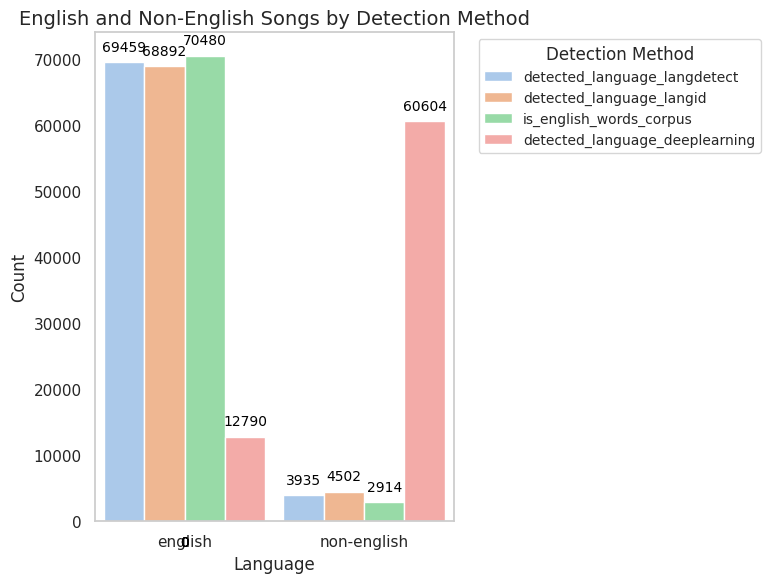

In [ ]:
# Prepare the data for plotting
data_for_plotting = []
for key, value in language_models.items():
    for language, count in value.items():
        data_for_plotting.append({'Detection Method': key, 'Language': language, 'Count': count})

# Convert to DataFrame
plotting_df = pd.DataFrame(data_for_plotting)

# Set the aesthetics for the plot
sns_15.set(style="whitegrid")

# Create the bar plot with even wider bars
plt_15.figure(figsize=(8, 6))
bar_plot = sns_15.barplot(data=plotting_df, x='Language', y='Count', hue='Detection Method', palette='pastel', width=0.9)  # Increased bar width

# Customize plot appearance
plt_15.title('English and Non-English Songs by Detection Method', fontsize=14)
plt_15.ylabel('Count', fontsize=12)
plt_15.xlabel('Language', fontsize=12)
plt_15.grid(visible=False)

# Display count numbers on top of bars with adjusted position
for p in bar_plot.patches:
    height = p.get_height()
    # Adjust position based on height to avoid overlap
    offset = 6 # More space for larger bars
    if height < 5:
        offset = -10  # For smaller bars, move text further below
    elif height < 20:
        offset = 5  # Slightly above for medium-sized bars

    bar_plot.annotate(f'{int(height)}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom' if offset > 0 else 'top',
                      fontsize=10, color='black',
                      xytext=(0, offset),
                      textcoords='offset points')

# Show the plot
plt_15.xticks(rotation=0)

# Adjust the legend position to be outside the plot
plt_15.legend(title='Detection Method', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt_15.tight_layout()
plt_15.show()


## Best Language Detection(Method-3:Corpus-Based English Language Detection)

In [ ]:
# display the best model time stamps

### Final Merged Dataset

In [ ]:
#display(language_detection_songs_dataframe[['id', 'lyrics', 'lyrics_detected_langdetect', 'detected_language_langid','is_english_words_corpus']].head(5))
# Merge the dataframes based on the 'id' column
songs_dataframe_cleaned_merged = songs_dataframe_cleaned.merge(
    language_detection_songs_dataframe[['id', 'lyrics_without_special_characters']],
    on='id',
    how='inner'
)

# Display the updated dataframe
print(songs_dataframe_cleaned_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73394 entries, 0 to 73393
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 73394 non-null  object 
 1   name                               73394 non-null  object 
 2   album_name                         73394 non-null  object 
 3   artists                            73394 non-null  object 
 4   danceability                       73394 non-null  float64
 5   energy                             73394 non-null  float64
 6   key                                73394 non-null  object 
 7   loudness                           73394 non-null  float64
 8   mode                               73394 non-null  object 
 9   speechiness                        73394 non-null  float64
 10  acousticness                       73394 non-null  float64
 11  instrumentalness                   73394 non-null  flo

In [ ]:
# Display the DataFrame in tabular format
pds_15.set_option('display.max_columns', None)  # Display all columns
pds_15.set_option('display.width', 1000)        # Set display width to fit more columns
pds_15.set_option('display.max_colwidth', None) # Prevent truncation of long text in columns
display(songs_dataframe_cleaned_merged.head(1))

,id,name,album_name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,lyrics_expanded,lyrics_without_special_characters
0,0Prct5TDjAnEgIqbxcldY9,!,UNDEN!ABLE,['HELLYEAH'],0.415,0.605,7,-11.157,1,0.0575,0.00116,0.838,0.471,0.193,100.059,79500.0,"said came Jamaica, owned couple acres couple fake visas 'cause never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that's seldom box better box held I'm Momma Dee order, call Daddy like daughters like get drunk, like sober That's top toppa, never fuck beginners let play pussy lick fingers, I'm zone holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? (alright) Baby world, ain't it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I'm long kisser try tell I'm one that's hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I'd get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that's mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, ain't high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, ain't it? Baby world, ain't it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah","said came Jamaica, owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things, bald like couple rings Bricks condo grams sing-sing Left arm, baby mother tatted 5-year bid North ratted Anyway felt him, helped him, put lock, seat-belt Took Belgium, welcome Bitches pretty, that is seldom box better box held I am Momma Dee order, call Daddy like daughters like get drunk, like sober That is top toppa, never fuck beginners let play pussy lick fingers, I am zone holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? (alright) Baby world, are not it? Uh, got nigga home one side Best friend dyke, fucked around times momma alike, fight tell ""make money"", tell ""make wife"" tell bitch ""you crazy, fuck wrong you?"" excuse French, I am long kisser try tell I am one that is hitting say ""what niggas?"" say: ""what niggas?"" right, tonight? Put something tight, judge me, I would get life love like brother, fuck like husband Pussy like oven, hot put tongue rub it, genie bottle Pussy wet, I'mma need goggles tell that is mine, tell ""stop lying, mine else? "" say worry Lil Tune holler me, you, you, are not high school crew, slide Give whenever want, whip whenever want Baby Anywhere, everywhere, baby world, are not it? Baby world, are not it? know want boy, see tryin' keep pushing, I'mma let slide close eyes and, horizon ready, come get Yeah, yeah, yeah, yeah",said came Jamaica owned couple acres couple fake visas because never got papers Gave love fucking heart breakers getting money movers shakers mixed couple things bald like couple rings Bricks condo grams singsing Left arm baby mother tatted 5year bid North ratted Anyway felt him helped him put lock seatbelt Took Belgium welcome Bitches pretty that is seldom box better box held I am Momma Dee order call Daddy like daughters like get drunk like sober That is top toppa never fuck beginners let play pussy lick fingers I am zone holler me you you are not high school crew slide Give whenever want whip whenever want Ba

In [ ]:
# Save the DataFrame as a CSV file
songs_dataframe_cleaned_merged.to_csv('songs_dataframe_cleaned.csv', index=False)